In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from datetime import datetime
import datetime as dt

In [3]:
Patients =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Patients")
EDVisits =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "EDVisits")
AmbulatoryVisits =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "AmbulatoryVisits")
ReAdmissionRegistry =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "ReAdmissionRegistry")
Discharges =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Discharges")
Providers =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Providers")
EDUnique = pd.read_excel("HospitalDatabase.xlsx", sheet_name= "EDUnique")

## 71 Create a visualization on the count of patients based on primary diagnosis.

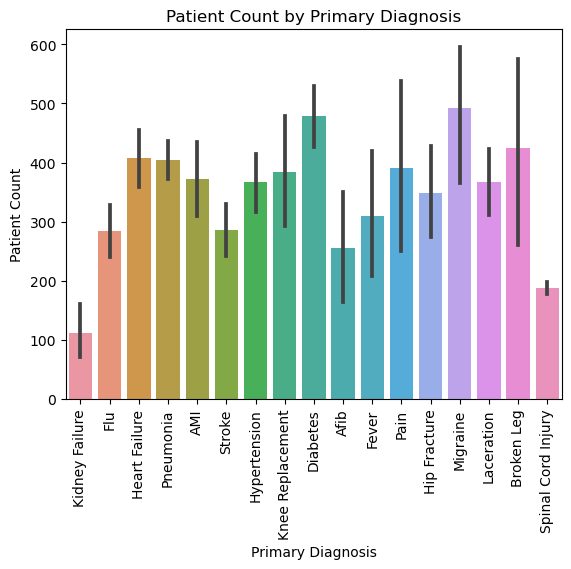

In [4]:
# Load data from ReAdmissionRegistry worksheet
df = pd.read_excel("HospitalDatabase.xlsx", sheet_name= "ReAdmissionRegistry")

df=df.sort_values(by='PatientID', ascending=True)

# Create a bar chart visualization
sns.barplot(x='PrimaryDiagnosis', y='PatientID', data=df)
plt.title('Patient Count by Primary Diagnosis')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Patient Count')
plt.xticks(rotation=90)
plt.show()

## 72: List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [4]:
#get Surgery specialist from Providers sheet

Providers= pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Providers")
SurgerySpecialty= Providers.loc[Providers['ProviderSpecialty']=='Surgery']

#get list of patients that underwent surgery from ambulatoryvisits- based on ProviderID for Surgery speciality

AmbVisits=pd.read_excel("HospitalDatabase.xlsx", sheet_name= "AmbulatoryVisits")
Merge1=SurgerySpecialty.merge(AmbVisits, on='ProviderID', how='inner')
#print(Merge1)

#Determine surgery patients >=60yrs.
#Determine Age using DOB in Patients sheet

from datetime import datetime
import datetime as dt
Patients =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "Patients")

Patients['Age']= (pd.datetime.now() - pd.to_datetime(Patients['DateOfBirth'])).astype('<m8[Y]')
SeniorPatients=Patients.loc[Patients['Age']>60]
Final_Merged=pd.merge(Merge1,SeniorPatients,left_on='PatientMRN', right_on='PatientID')
#print(Final_Merged)

#Surgery-above 60-Male Patients only

MalePatientsOnly=Final_Merged.loc[Final_Merged['Gender']=='Male']
#print(MalePatientsOnly)

#Male Patients with surgery between jan-mar 2019
#Date Range
StartDate= '2019-01-01'
EndDate= '2019-03-31'
mask = (MalePatientsOnly['DateofVisit']>StartDate) & (MalePatientsOnly['DateofVisit']<= EndDate)
Jan_Mar_2019SeniorMales=MalePatientsOnly.loc[mask]


#Names Of Male Patients
FName_LName=Jan_Mar_2019SeniorMales.loc[:,['FirstName', 'LastName']]
print(FName_LName.head())


    FirstName LastName
4   Constanta    Edgin
5     Gabriel    Saint
6       Berta    Loxly
12  Daugherty   Conner


C:\Users\Puja\AppData\Local\Temp\ipykernel_15872\2820637410.py:19: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  Patients['Age']= (pd.datetime.now() - pd.to_datetime(Patients['DateOfBirth'])).astype('<m8[Y]')


## 75: Calculate the time spent in ED Department for each visit.

In [5]:
EDVisits =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "EDVisits")
EDVisits['TimeSpent']=(pd.to_datetime(EDVisits['EDDischargeTime'])-pd.to_datetime(EDVisits['VisitDate']))
print(EDVisits)

      EDVisitID  PatientID               VisitDate         EDDischargeTime  \
0             1          1 2020-01-01 00:00:00.000 2020-01-01 11:20:22.924   
1            12         12 2020-01-01 02:45:40.302 2020-01-02 02:00:00.517   
2            13         13 2020-01-01 03:09:24.701 2020-01-01 05:00:20.852   
3            14         14 2020-01-01 03:12:19.349 2020-01-01 04:32:29.142   
4            15         15 2020-01-01 03:46:32.698 2020-01-01 06:24:52.741   
...         ...        ...                     ...                     ...   
1194       1183        929 2020-01-15 10:38:42.570 2020-01-16 02:31:52.023   
1195       1186        932 2020-01-15 11:52:37.540 2020-01-16 10:19:41.570   
1196       1187        933 2020-01-15 12:11:11.678 2020-01-15 16:41:15.223   
1197       1188        934 2020-01-15 12:21:46.006 2020-01-15 18:32:21.060   
1198       1189        935 2020-01-15 12:51:14.875 2020-01-15 23:40:41.456   

      Acuity ReasonForVisit EDDisposition              TimeSpen

## 78: Find reasonForVisit with highest count of acuity 5 patients.

In [ ]:
EDVisits =pd.read_excel("HospitalDatabase.xlsx", sheet_name= "EDVisits")
Acuity5=EDVisits[EDVisits['Acuity']==5]
ReasonOfVisitGroup=Acuity5.groupby('ReasonForVisit').idxmax()
MaxAcuityRow=ReasonOfVisitGroup['Acuity'].idxmax()
print(ReasonOfVisitGroup)

print("Reason for visit with maximun Acuitycount: ", MaxAcuityRow)